In [6]:
import cv2
import numpy as np

def inpaint_exemplar(image, mask, patch_size=5):
    # Convert mask to binary
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

    # Create a copy of the image
    inpainted_image = np.copy(image)

    # Define the region where inpainting will be performed
    inpaint_mask = np.zeros_like(mask)
    inpaint_mask[mask == 255] = 1

    # Iterate over the damaged regions
    for y in range(patch_size, image.shape[0] - patch_size):
        for x in range(patch_size, image.shape[1] - patch_size):
            if mask[y, x] == 255:  # If pixel is damaged
                # Extract the damaged patch
                damaged_patch = image[y - patch_size:y + patch_size, x - patch_size:x + patch_size]

                # Search for a similar patch in the image
                similarity_map = cv2.matchTemplate(image, damaged_patch, cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(similarity_map)

                # Get the location of the most similar patch
                similar_patch_loc = max_loc

                # Replace damaged region with the similar patch
                inpainted_image[y - patch_size:y + patch_size, x - patch_size:x + patch_size] = \
                    image[similar_patch_loc[1] - patch_size:similar_patch_loc[1] + patch_size,
                    similar_patch_loc[0] - patch_size:similar_patch_loc[0] + patch_size]

                # Update inpainting mask
                inpaint_mask[y - patch_size:y + patch_size, x - patch_size:x + patch_size] = 0

    # Inpaint using the remaining damaged regions
    inpainted_image = cv2.inpaint(inpainted_image, inpaint_mask, inpaintRadius=patch_size*2, flags=cv2.INPAINT_TELEA)

    return inpainted_image


# Example usage
image = cv2.imread('cat_damaged.png')
mask = cv2.imread('cat_mask.png')

# Perform exemplar-based inpainting
inpainted_image = inpaint_exemplar(image, mask)

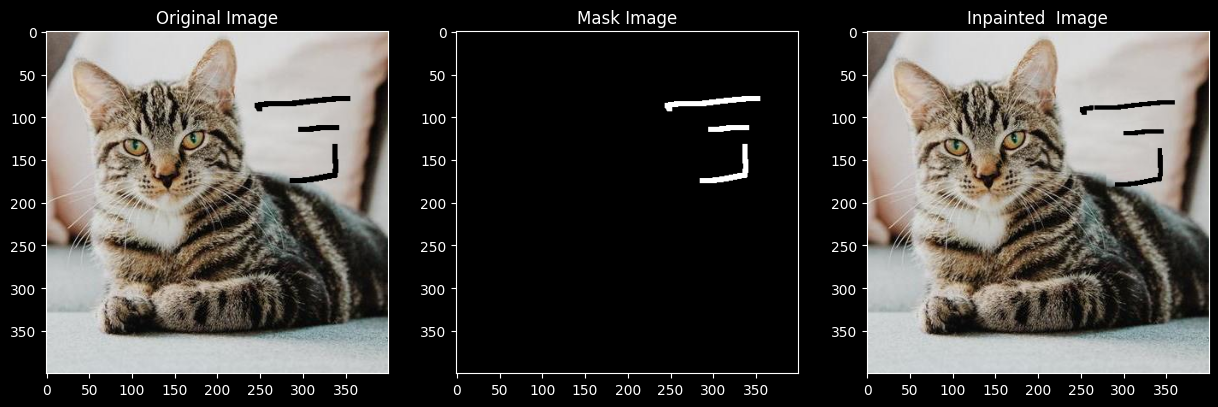

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
plt.title('Mask Image')


plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(inpainted_image,cv2.COLOR_BGR2RGB))
plt.title('Inpainted  Image')

plt.show()